## Importing modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Concatenating data

## Combining rows of data

The dataset you'll be working with here relates to [NYC Uber data](http://data.beta.nyc/dataset/uber-trip-data-foiled-apr-sep-2014). The original dataset has all the originating Uber pickup locations by time and latitude and longitude. For didactic purposes, you'll be working with a very small portion of the actual data.

Three DataFrames have been pre-loaded: uber1, which contains data for April 2014, uber2, which contains data for May 2014, and uber3, which contains data for June 2014. Your job in this exercise is to concatenate these DataFrames together such that the resulting DataFrame has the data for all three months.

Begin by exploring the structure of these three DataFrames in the IPython Shell using methods such as .head().

* [pd.concat()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)
* [.shape attribute](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html)

In [2]:
import pandas as pd

uber1 = pd.read_csv('uber1.csv', index_col=0)
uber2 = pd.read_csv('uber2.csv', index_col=0)
uber3 = pd.read_csv('uber3.csv', index_col=0)
print('Shapes: uber1='+str(uber1.shape)+'; uber2='+str(uber2.shape)+'; uber3='+str(uber3.shape))

uber1.head()

Shapes: uber1=(99, 4); uber2=(99, 4); uber3=(98, 4)


,Date/Time,Lat,Lon,Base
0,04/01/2014 00:11,40.7690,-73.9549,B02512
1,04/01/2014 00:17,40.7267,-74.0345,B02512
2,04/01/2014 00:21,40.7316,-73.9873,B02512
3,04/01/2014 00:28,40.7588,-73.9776,B02512
4,04/01/2014 00:33,40.7594,-73.9722,B02512


In [3]:
# Concatenate using pd.contat
row_concat = pd.concat([uber1, uber2, uber3])
print('Shape: '+str(row_concat.shape))
row_concat.head()

Shape: (296, 4)


,Date/Time,Lat,Lon,Base
0,04/01/2014 00:11,40.7690,-73.9549,B02512
1,04/01/2014 00:17,40.7267,-74.0345,B02512
2,04/01/2014 00:21,40.7316,-73.9873,B02512
3,04/01/2014 00:28,40.7588,-73.9776,B02512
4,04/01/2014 00:33,40.7594,-73.9722,B02512


### Ignoring index problems

The three dataframes all retain their original indices. 

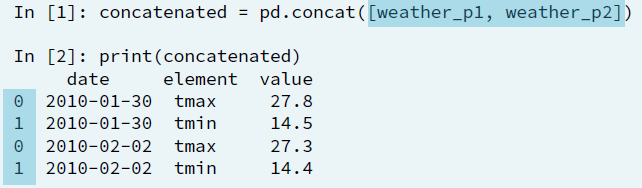

Although row_concat has 296 entries, tail shows the last entry has index 98 

In [4]:
row_concat.tail()

,Date/Time,Lat,Lon,Base
94,06/01/2014 06:27,40.7554,-73.9738,B02512
95,06/01/2014 06:35,40.7543,-73.9817,B02512
96,06/01/2014 06:37,40.7751,-73.9633,B02512
97,06/01/2014 06:46,40.6952,-74.1784,B02512
98,06/01/2014 06:51,40.7621,-73.9817,B02512


This can be a problem when you use index as an argument, as multiple rows with that index will be returned.

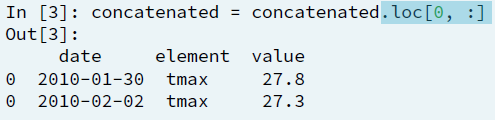

The answer is to set the 'ignore index' parameter to True in the concat function 

In [5]:
row_concat_b = pd.concat([uber1, uber2, uber3], ignore_index=True)
row_concat_b.tail()

,Date/Time,Lat,Lon,Base
291,06/01/2014 06:27,40.7554,-73.9738,B02512
292,06/01/2014 06:35,40.7543,-73.9817,B02512
293,06/01/2014 06:37,40.7751,-73.9633,B02512
294,06/01/2014 06:46,40.6952,-74.1784,B02512
295,06/01/2014 06:51,40.7621,-73.9817,B02512


## Combining columns of data

Think of column-wise concatenation of data as stitching data together from the sides instead of the top and bottom. To perform this action, you use the same pd.concat() function, but this time with the keyword argument axis=1. The default, axis=0, is for a row-wise concatenation.

You'll return to the Ebola dataset you worked with briefly in the last chapter. It has been pre-loaded into a DataFrame called ebola_melt. In this DataFrame, the status and country of a patient is contained in a single column. This column has been parsed into a new DataFrame, status_country, where there are separate columns for status and country.

Explore the ebola_melt and status_country DataFrames in the IPython Shell. Your job is to concatenate them column-wise in order to obtain a final, clean DataFrame.

To combine dataframes side by side instead of adding on to the bottom, use column concatenation. This is done by setting axis=1 in the concat function 

For this example, the ebola_melt data from the last lesson will be used
But it is separated out into two dataframes: one with the status_country and counts, and another with status and country

In [6]:
# Load the dataframe and make the amendments to fit datacamp data
ebola_base = pd.read_csv("ebola_melt.csv",index_col=0)
ebola_melt = ebola_base.loc[:,['Date','Day','type_country','counts']]

status_country = ebola_base.loc[:,['type','country']]

status_country.head()

,type,country
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [7]:
# Now concatenate columnwise by specifying axis=1
ebola_tidy = pd.concat([ebola_melt,status_country],axis=1)
print(ebola_tidy.shape)
ebola_tidy.head()

(1952, 6)


,Date,Day,type_country,counts,type,country
0,1/5/2015,289,NaN,2776.0,Cases,Guinea
1,1/4/2015,288,NaN,2775.0,Cases,Guinea
2,1/3/2015,287,NaN,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,NaN,Cases,Guinea
4,12/31/2014,284,NaN,2730.0,Cases,Guinea


## Finding and concatenating data

Sometimes, the data you need will be across several files and you need to concatenate them all. Python has funcionality for this and uses a module called glob.  The process is: 

* Import glob
* Use regular expression type expressions within glob's glob function to find filenames fitting a particular pattern (e.g. * for any number of any character, or ? for 1 of any character) and load all of the fitting filenames into a list
* Cycle through this list and load each of the items in it as a dataframe
* Concatenate the dataframes

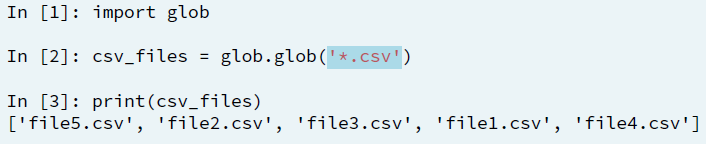

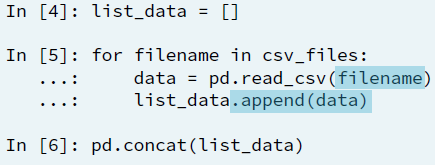

## Finding files that match a pattern

You're now going to practice using the glob module to find all csv files in the workspace. In the next exercise, you'll programmatically load them into DataFrames.

The glob module has a function called glob that takes a pattern and returns a list of the files in the working directory that match that pattern.

For example, if you know the pattern is part single digit number .csv, you can write the pattern as 'part\_?.csv' (which would match part_1.csv, part_2.csv, part_3.csv, etc.)

Similarly, you can find all .csv files with '\*.csv', or all parts with 'part\_\*'. The ? wildcard represents any 1 character, and the \* wildcard represents any number of characters.

* [glob module](https://docs.python.org/3/library/glob.html#module-glob)

In [6]:
## First find the matching files
import glob

pattern = '*.csv'
csv_files = glob.glob(pattern)
print(csv_files)

# Inspect the second file for example purposes
csv2 = pd.read_csv(csv_files[1], index_col=0)
csv2.head()

['uber1.csv', 'uber2.csv', 'uber3.csv']


,Date/Time,Lat,Lon,Base
0,05/01/2014 00:02,40.7521,-73.9914,B02512
1,05/01/2014 00:06,40.6965,-73.9715,B02512
2,05/01/2014 00:15,40.7464,-73.9838,B02512
3,05/01/2014 00:17,40.7463,-74.0011,B02512
4,05/01/2014 00:17,40.7594,-73.9734,B02512


## Iterating and concatenating all matches

Now that you have a list of filenames to load, you can load all the files into a list of DataFrames that can then be concatenated.

You'll start with an empty list called frames. Your job is to use a for loop to iterate through each of the filenames, read each filename into a DataFrame, and then append it to the frames list.

You can then concatenate this list of DataFrames using pd.concat(). Go for it!

In [7]:
frames = []

for csv in csv_files:
    df = pd.read_csv(csv, index_col=0)  #  Read csv into a DataFrame: df
    frames.append(df)  # Append df to frames

uber = pd.concat(frames)  # Concatenate frames into a single DataFrame: uber

print(uber.shape)
print('\n')
uber.head()

(296, 4)




,Date/Time,Lat,Lon,Base
0,04/01/2014 00:11,40.7690,-73.9549,B02512
1,04/01/2014 00:17,40.7267,-74.0345,B02512
2,04/01/2014 00:21,40.7316,-73.9873,B02512
3,04/01/2014 00:28,40.7588,-73.9776,B02512
4,04/01/2014 00:33,40.7594,-73.9722,B02512


## Merge data

Concatenation is essentially tagging one dataframe onto another one - either to the bottom of it or to the side of it. 

This is not the only way that dataframes can be combined. If there are two dataframes that share a common variable, they their data can be combined using that variable as the common factor. If there are separate dataframes on a state's population and its ANSI code, for example:

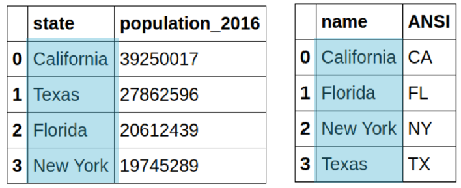

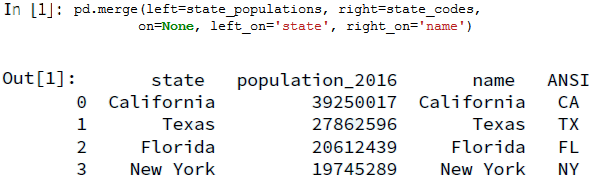

'left' and 'right' are the two dataframes. 'On' would be used if the common variable had the same name on both dataframes. Because in this case it doesn't, the left_on and right_on are used to state what the common variable is called in the left and right dataframes respectively 

## 1-to-1 data merge

Merging data allows you to combine disparate datasets into a single dataset to do more complex analysis.

Here, you'll be using survey data that contains readings that William Dyer, Frank Pabodie, and Valentina Roerich took in the late 1920 and 1930 while they were on an expedition towards Antarctica. The dataset was taken from a sqlite database from the [Software Carpentry SQL lesson](http://swcarpentry.github.io/sql-novice-survey/).

Two DataFrames have been pre-loaded: site and visited. Explore them in the IPython Shell and take note of their structure and column names. Your task is to perform a 1-to-1 merge of these two DataFrames using the 'name' column of site and the 'site' column of visited.

In [18]:
# To see an example, let's make up some small dataframes
# They have in common site/name

sit = {'name':['DR-1','DR-3','MSK-4'],'lat':[-49.85,-47.15,-48.87],'long':[-128.57,-126.72,-123.40]}
site = pd.DataFrame(sit)
print(site)
print()
viz = {'ident':[619, 734, 837],'site':['DR-1','DR-3','MSK-4'],'dated':['1927-02-08','1939-01-07','1932-01-14']}
visited = pd.DataFrame(viz)
print(visited)

     lat    long   name
0 -49.85 -128.57   DR-1
1 -47.15 -126.72   DR-3
2 -48.87 -123.40  MSK-4

        dated  ident   site
0  1927-02-08    619   DR-1
1  1939-01-07    734   DR-3
2  1932-01-14    837  MSK-4


In [10]:
o2o = pd.merge(left=site, right=visited, on=None, left_on='name', right_on='site')
o2o

,lat,long,name,dated,ident,site
0,-49.85,-128.57,DR-1,1927-02-08,619,DR-1
1,-47.15,-126.72,DR-3,1939-01-07,734,DR-3
2,-48.87,-123.40,MSK-4,1932-01-14,837,MSK-4


This was a one to one merge: there were the same number of entries in both and they correspond in a one on one way. Other options are one to many and many to one. If one dataframe has an entry several times, and the other only once, then the data from the one frame will be repeated in the many frame when they are merged.

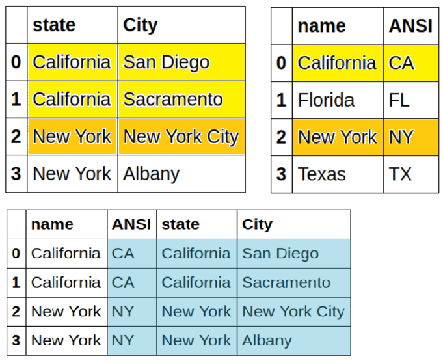

## Many-to-1 data merge

In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.

Here, the two DataFrames site and visited have been pre-loaded once again. Note that this time, visited has multiple entries for the site column. Confirm this by exploring it in the IPython Shell.

The .merge() method call is the same as the 1-to-1 merge from the previous exercise, but the data and output will be different.

In [19]:
# This time, site is the same but visited will include more records, as dictated by this dictionary:

viz = {'dated': {0: '08/02/1927',  1: '10/02/1927',  2: '07/01/1939',  3: '12/01/1930',  4: '26/02/1930',  5: float('nan'),
  6: '14/01/1932',  7: '22/03/1932'},
 'ident': {0: 619, 1: 622, 2: 734, 3: 735, 4: 751, 5: 752, 6: 837, 7: 844},
 'site': {0: 'DR-1',  1: 'DR-1',  2: 'DR-3',  3: 'DR-3',  4: 'DR-3',  5: 'DR-3',  6: 'MSK-4',  7: 'DR-1'}}

visited_b = pd.DataFrame(viz)
print(site)
print()
print(visited_b)

     lat    long   name
0 -49.85 -128.57   DR-1
1 -47.15 -126.72   DR-3
2 -48.87 -123.40  MSK-4

        dated  ident   site
0  08/02/1927    619   DR-1
1  10/02/1927    622   DR-1
2  07/01/1939    734   DR-3
3  12/01/1930    735   DR-3
4  26/02/1930    751   DR-3
5         NaN    752   DR-3
6  14/01/1932    837  MSK-4
7  22/03/1932    844   DR-1


In [13]:
m2o = pd.merge(left=site, right=visited_b, on=None, left_on='name', right_on='site')
m2o

,lat,long,name,dated,ident,site
0,-49.85,-128.57,DR-1,08/02/1927,619,DR-1
1,-49.85,-128.57,DR-1,10/02/1927,622,DR-1
2,-49.85,-128.57,DR-1,22/03/1932,844,DR-1
3,-47.15,-126.72,DR-3,07/01/1939,734,DR-3
4,-47.15,-126.72,DR-3,12/01/1930,735,DR-3
5,-47.15,-126.72,DR-3,26/02/1930,751,DR-3
6,-47.15,-126.72,DR-3,NaN,752,DR-3
7,-48.87,-123.40,MSK-4,14/01/1932,837,MSK-4


## Many-to-many data merge

The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.

Two example DataFrames that share common key values have been pre-loaded: df1 and df2. Another DataFrame df3, which is the result of df1 merged with df2, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.

Here, you'll work with the site and visited DataFrames from before, and a new survey DataFrame. Your task is to merge site and visited as you did in the earlier exercises. You will then merge this merged DataFrame with survey.

Begin by exploring the site, visited, and survey DataFrames in the IPython Shell.

In [15]:
# To illustrate this, we will add a new dataframe, survey, and merge it with the result of the previous 
# two merges, site and visits. We will merge on 'ident' and 'taken'

suv = {'person': {0: 'dyer',   1: 'dyer',   2: 'dyer',   3: 'dyer',   4: 'pb',   5: 'lake',   6: 'pb',   7: 'pb',   
                  8: float('NaN'), 9: float('NaN'),   10: 'pb',   11: 'pb',   12: 'lake',   13: 'lake',   14: 'lake',   
                  15: 'lake',   16: 'roe', 17: 'lake',   18: 'lake',   19: 'roe',   20: 'roe'},  
 'quant': {0: 'rad',   1: 'sal',   2: 'rad',   3: 'sal', 4: 'rad',   5: 'sal',   6: 'temp',   7: 'rad', 8: 'sal',   
           9: 'temp',   10: 'rad',   11: 'temp',   12: 'sal',   13: 'rad',   14: 'sal',   15: 'temp',   16: 'sal',   
           17: 'rad',   18: 'sal',   19: 'sal',   20: 'rad'},  
 'reading': {0: 9.8200000000000003,   1: 0.13,   2: 7.7999999999999998,   3: 0.089999999999999997,   
             4: 8.4100000000000001,   5: 0.050000000000000003,   6: -21.5,   7: 7.2199999999999998,   
             8: 0.059999999999999998,   9: -26.0,   10: 4.3499999999999996,   11: -18.5,   12: 0.10000000000000001,  
             13: 2.1899999999999999,   14: 0.089999999999999997,   15: -16.0,   16: 41.600000000000001,   17: 1.46,   
             18: 0.20999999999999999,   19: 22.5,   20: 11.25},  
 'taken': {0: 619,   1: 619,   2: 622,   3: 622,   4: 734,   5: 734,   6: 734,   7: 735,   8: 735,   9: 735,   
           10: 751,   11: 751,   12: 751,   13: 752,   14: 752,   15: 752,   16: 752,   17: 837,   18: 837,   19: 837,   
           20: 844}}

survey = pd.DataFrame(suv)
survey

,person,quant,reading,taken
0,dyer,rad,9.82,619
1,dyer,sal,0.13,619
2,dyer,rad,7.80,622
3,dyer,sal,0.09,622
4,pb,rad,8.41,734
5,lake,sal,0.05,734
6,pb,temp,-21.50,734
7,pb,rad,7.22,735
8,NaN,sal,0.06,735
9,NaN,temp,-26.00,735


In [22]:
# Merge site and visited_b: m2m
m2m = pd.merge(left=site, right=visited_b, left_on='name', right_on='site')

print(m2m)
print()
print(survey)

     lat    long   name       dated  ident   site
0 -49.85 -128.57   DR-1  08/02/1927    619   DR-1
1 -49.85 -128.57   DR-1  10/02/1927    622   DR-1
2 -49.85 -128.57   DR-1  22/03/1932    844   DR-1
3 -47.15 -126.72   DR-3  07/01/1939    734   DR-3
4 -47.15 -126.72   DR-3  12/01/1930    735   DR-3
5 -47.15 -126.72   DR-3  26/02/1930    751   DR-3
6 -47.15 -126.72   DR-3         NaN    752   DR-3
7 -48.87 -123.40  MSK-4  14/01/1932    837  MSK-4

   person quant  reading  taken
0    dyer   rad     9.82    619
1    dyer   sal     0.13    619
2    dyer   rad     7.80    622
3    dyer   sal     0.09    622
4      pb   rad     8.41    734
5    lake   sal     0.05    734
6      pb  temp   -21.50    734
7      pb   rad     7.22    735
8     NaN   sal     0.06    735
9     NaN  temp   -26.00    735
10     pb   rad     4.35    751
11     pb  temp   -18.50    751
12   lake   sal     0.10    751
13   lake   rad     2.19    752
14   lake   sal     0.09    752
15   lake  temp   -16.00    752
16   

In [23]:
# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
m2m.head(20)

,lat,long,name,dated,ident,site,person,quant,reading,taken
0,-49.85,-128.57,DR-1,08/02/1927,619,DR-1,dyer,rad,9.82,619
1,-49.85,-128.57,DR-1,08/02/1927,619,DR-1,dyer,sal,0.13,619
2,-49.85,-128.57,DR-1,10/02/1927,622,DR-1,dyer,rad,7.80,622
3,-49.85,-128.57,DR-1,10/02/1927,622,DR-1,dyer,sal,0.09,622
4,-49.85,-128.57,DR-1,22/03/1932,844,DR-1,roe,rad,11.25,844
5,-47.15,-126.72,DR-3,07/01/1939,734,DR-3,pb,rad,8.41,734
6,-47.15,-126.72,DR-3,07/01/1939,734,DR-3,lake,sal,0.05,734
7,-47.15,-126.72,DR-3,07/01/1939,734,DR-3,pb,temp,-21.50,734
8,-47.15,-126.72,DR-3,12/01/1930,735,DR-3,pb,rad,7.22,735
9,-47.15,-126.72,DR-3,12/01/1930,735,DR-3,NaN,sal,0.06,735


## Merge 'how': left, right, inner, outer

Additional material on merging is [here](https://www.kaggle.com/crawford/python-merge-tutorial). 
This link discusses the merge 'how', which is 'inner' by default (and not discussed in the datacamp lessons)

The syntax when the how is included is:

>pd.merge(left_dataframe, right_dataframe, on="some_column", how="left|right|inner|outer)

or, if there is no common key value

>pd.merge(left_df, right_df, on=None, left_on='somecol", right_on="somecol", how="left|right|inner|outer")

The how is about how values that do not match are treated

The left merge keeps all values from the left dataframe and discards any from the right that aren't present in the left. 
The right merge does the opposite

The following two dataframes, df1 and df2, have the same c1 key values but do not have unique values for this key (e.g. df1 
has both 1 and 2 as entreis for the key a; df2 has 10 and 20 for the entries under key a).

What happens here is that for each duplicated key, every pairwise combination will be created. In this case, df3 will be the result

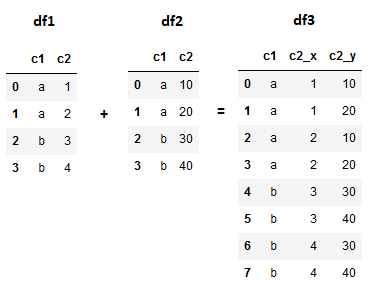

left and right merge

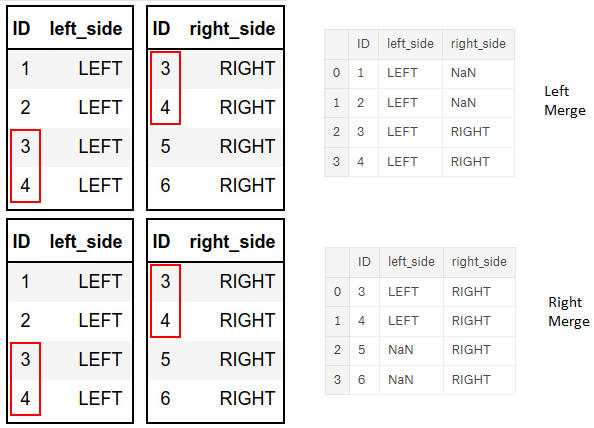

The inner merge only keeps values that are present in both dataframes, discarding all that don't match.
The outer merge matches those entries that do match but keeps all entries 

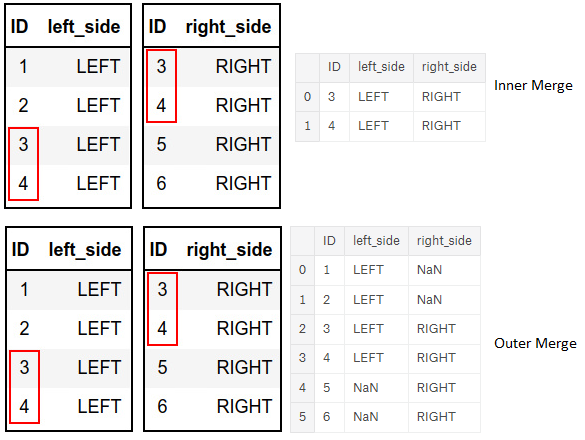

## Appendix: Methods

__Methods__
* [pd.concat()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

__Attributes__
* [.shape attribute](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html)

__Modules__
* [glob module](https://docs.python.org/3/library/glob.html#module-glob)
